In [108]:
# 모듈 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torchinfo import summary
from torch.autograd import Variable

from sklearn.model_selection import train_test_split

In [109]:
# 데이터 로딩 함수
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [110]:
# 데이터 로딩 (라벨 목록)
PATH = '../data/cifar-10-batches-py/'

unpickle(PATH + 'batches.meta')

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [111]:
# 데이터 로딩 (데이터)

batch_1_data = unpickle(PATH + 'data_batch_1')[b'data']
batch_1_labels = unpickle(PATH + 'data_batch_1')[b'labels']

batch_2_data = unpickle(PATH + 'data_batch_2')[b'data']
batch_2_labels = unpickle(PATH + 'data_batch_2')[b'labels']

batch_3_data = unpickle(PATH + 'data_batch_3')[b'data']
batch_3_labels = unpickle(PATH + 'data_batch_3')[b'labels']

batch_4_data = unpickle(PATH + 'data_batch_4')[b'data']
batch_4_labels = unpickle(PATH + 'data_batch_4')[b'labels']

batch_5_data = unpickle(PATH + 'data_batch_5')[b'data']
batch_5_labels = unpickle(PATH + 'data_batch_5')[b'labels']

test_batch_data = unpickle(PATH + 'test_batch')[b'data']
test_batch_labels = unpickle(PATH + 'test_batch')[b'labels']



In [112]:
# 데이터 병합 및 전처리

X_train = [batch_1_data, batch_2_data, batch_3_data, batch_4_data, batch_5_data]
y_train = [batch_1_labels, batch_2_labels, batch_3_labels, batch_4_labels, batch_5_labels]

X_test = np.array(test_batch_data).reshape(-1, 3, 32, 32)
y_test = np.array(test_batch_labels)

X_train = np.concatenate(X_train).reshape(-1, 3, 32, 32)
y_train = np.concatenate(y_train)


print(f"X_train's shape : {X_train.shape}, y_train's shape : {y_train.shape}, X_test's shape : {X_test.shape}, y_test's shape : {y_test.shape}")

X_train's shape : (50000, 3, 32, 32), y_train's shape : (50000,), X_test's shape : (10000, 3, 32, 32), y_test's shape : (10000,)


In [113]:
# 디바이스 설정
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [114]:
# class CifarDataset(Dataset):
    
#     def __init__(self, featureDF, targetDF):
#         self.featureDF = featureDF
#         self.targetDF = targetDF
#         self.n_rows = featureDF.shape[0]
#         self.n_features = featureDF.shape[1]

#     def __len__(self):
#         return self.n_rows
    
#     def __getitem__(self, index):
#         # 텐서화
#         featureTS = torch.IntTensor(self.featureDF.iloc[index].values)
#         targetTS = torch.IntTensor(self.targetDF.iloc[index].values)

#         return featureTS, targetTS

In [115]:
# 검증용 데이터 나누기

# X_train, X_val, y_train, y_val = train_test_split(X_train, 
#                                                   y_train, 
#                                                   test_size = 0.2,
#                                                   stratify = y_train,
#                                                   random_state = 1)

print(f"X_train's shape : {X_train.shape}, y_train's shape : {y_train.shape}, X_val's shape : {X_val.shape}, y_val's shape : {y_val.shape}")

X_train's shape : (50000, 3, 32, 32), y_train's shape : (50000,), X_val's shape : torch.Size([10000, 3, 32, 32]), y_val's shape : torch.Size([10000])


In [116]:
# 데이터 셋 만들기

X_train = torch.Tensor(X_train)
# X_val = torch.Tensor(X_val)
X_test = torch.Tensor(X_test)

y_train = torch.Tensor(y_train)
# y_val = torch.Tensor(y_val)
y_test = torch.Tensor(y_test)

train_dataset = TensorDataset(X_train, y_train)
# val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

In [117]:
BATCH_SIZE = 50

trainDL = DataLoader(train_dataset)
# valDL = DataLoader(val_dataset)
testDL = DataLoader(test_dataset)

tensor([6.]) 6.0
tensor([[[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000

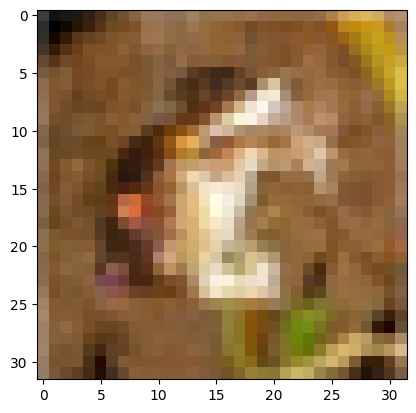

In [130]:
for data, target in trainDL:
    print(target, target.item())
    data = data / 255.0
    print(data)
    data1 = data.squeeze()
    plt.imshow(data1.transpose(0, 2))
    break

In [124]:
class ImageMCF(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(3, 30, 3),
            nn.ReLU(),
            nn.Conv2d(30, 20, 3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.cnn_layer2 = nn.Sequential(
            nn.Conv2d(20, 10, 3),
            nn.ReLU(),
            nn.AvgPool2d(2)
        )

        self.hd_layer = nn.Linear(10 * 6 * 6, 50)
        self.out_layer = nn.Linear(50, 10)

    def forward(self, input):
        output = self.cnn_layer(input)
        output = self.cnn_layer2(output)
        output = output.view(output.shape[0], -1)
        output = F.relu(self.hd_layer(output))
        output = F.relu(self.out_layer(output))


        return output

In [125]:
m = ImageMCF()

In [126]:
summary(m)

Layer (type:depth-idx)                   Param #
ImageMCF                                 --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       840
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       5,420
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       1,810
│    └─ReLU: 2-7                         --
│    └─AvgPool2d: 2-8                    --
├─Linear: 1-3                            18,050
├─Linear: 1-4                            510
Total params: 26,630
Trainable params: 26,630
Non-trainable params: 0

In [127]:
learning_rate = 0.001
model = ImageMCF()
model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
print(model)


ImageMCF(
  (cnn_layer): Sequential(
    (0): Conv2d(3, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_layer2): Sequential(
    (0): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (hd_layer): Linear(in_features=360, out_features=50, bias=True)
  (out_layer): Linear(in_features=50, out_features=10, bias=True)
)


In [128]:
EPOCH = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(EPOCH):
    for images, labels in trainDL:
        images, labels = images.to(DEVICE), labels.to(DEVICE)

        train = Variable(images.view(-1, 3, 32, 32))
        labels = labels.long()

        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1

    if not (count % 50):
        total = 0
        correct = 0
        for images, labels in testDL:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            labels_list.append(labels)
            test = Variable(images.view(-1, 3, 32, 32))
            outputs = model(test)
            predictions = torch.max(outputs, 1)[1].to(DEVICE)
            predictions_list.append(predictions)
            correct += (predictions == labels).sum()
            total += len(labels)

        accuracy = correct * 100 / total
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)

    if not (count % 500):
        print("Iteration : {}, Loss : {}, Accuracy : {}%".format(count, loss.data, accuracy))


Iteration : 500, Loss : 2.3197531700134277, Accuracy : 10.039999961853027%


KeyboardInterrupt: 